In [1]:
import pandas as pd
import pre_processing as prep


# Preprocess
def preprocess(df: pd.DataFrame):
    """ Renaming columns to more generalized format (e.g., "worker" instead of "worker1") """
    df.columns = [prep.rename_workers(col) for col in df.columns]
    df.columns = [prep.rename_container_columns(col) for col in df.columns]

    """ Filtering out columns that are useless or difficult to use (e.g., process specific metrics) """
    filtered_columns = [col for col in df.columns if prep.filter_namespaces(col)]
    df = df[filtered_columns]

    filtered_columns = [col for col in df.columns if prep.filter_go_specific(col)]
    df = df[filtered_columns]

    filtered_columns = [col for col in df.columns if prep.filter_process_specific(col)]
    df = df[filtered_columns]

    filtered_columns = [col for col in df.columns if prep.filter_durations(col)]
    df = df[filtered_columns]

    filtered_columns = [col for col in df.columns if prep.filter_experiment_specific(col)]
    df = df[filtered_columns]

    """ Convert monontonically increasing cols to rates (counters to gauges) (e.g., total joules to joules per unit of time) """
    counters = prep.get_counters(df)
    df = prep.convert_to_rates(df, counters)
    filtered_columns = [col for col in df.columns if col not in counters]
    df = df[filtered_columns]
    df = df.copy()  # Get defragmented copy of the df after all the edits (probably does nothing useful)
    return df


# Save feather

In [2]:
import os

# Get all model subfolders
root_folder = '../data/minimized_run_3'
filename = 'worker1.feather'
model_folders = prep.find_subfolders_with_file(root_folder, filename)
print(model_folders)

# For each worker feather
save_folder = "preprocessed_workers/"
for model_folder in model_folders:
    last_folder = os.path.basename(model_folder.strip('/'))
    for worker in range(1,6):
        print(f"Preprocessing worker {worker}")
        path = f"{model_folder}/worker{worker}.feather"
        df = pd.read_feather(path)
        df = preprocess(df)
        save_path = f"{save_folder}/{last_folder}/"
        os.makedirs(save_path, exist_ok=True)
        df.to_feather(f"{save_path}worker{worker}.feather")
        print(f"Saved worker{worker} to {save_path}worker{worker}.feather")

['../data/minimized_run_3/1730280141_yolov9e_1280', '../data/minimized_run_3/1730215709_yolov9c_160', '../data/minimized_run_3/1730211503_yolov10l_160', '../data/minimized_run_3/1730251802_yolov8n_640', '../data/minimized_run_3/1730230004_yolov9t_320', '../data/minimized_run_3/1730257386_yolo11s_1280', '../data/minimized_run_3/1730214868_yolov9m_160', '../data/minimized_run_3/1730222435_yolo11s_320', '../data/minimized_run_3/1730263696_yolo11x_1280', '../data/minimized_run_3/1730206458_yolo11m_160', '../data/minimized_run_3/1730247262_yolov9t_640', '../data/minimized_run_3/1730272260_yolov9t_1280', '../data/minimized_run_3/1730221594_yolo11n_320', '../data/minimized_run_3/1730235892_yolov8m_320', '../data/minimized_run_3/1730253484_yolov8m_640', '../data/minimized_run_3/1730227481_yolov10m_320', '../data/minimized_run_3/1730249802_yolov9c_640', '../data/minimized_run_3/1730268739_yolov10l_1280', '../data/minimized_run_3/1730212344_yolov10x_160', '../data/minimized_run_3/1730265410_yolo

['../data/minimized_run_3/1730280141_yolov9e_1280', '../data/minimized_run_3/1730215709_yolov9c_160', '../data/minimized_run_3/1730211503_yolov10l_160', '../data/minimized_run_3/1730251802_yolov8n_640', '../data/minimized_run_3/1730230004_yolov9t_320', '../data/minimized_run_3/1730257386_yolo11s_1280', '../data/minimized_run_3/1730214868_yolov9m_160', '../data/minimized_run_3/1730222435_yolo11s_320', '../data/minimized_run_3/1730263696_yolo11x_1280', '../data/minimized_run_3/1730206458_yolo11m_160', '../data/minimized_run_3/1730247262_yolov9t_640', '../data/minimized_run_3/1730272260_yolov9t_1280', '../data/minimized_run_3/1730221594_yolo11n_320', '../data/minimized_run_3/1730235892_yolov8m_320', '../data/minimized_run_3/1730253484_yolov8m_640', '../data/minimized_run_3/1730227481_yolov10m_320', '../data/minimized_run_3/1730249802_yolov9c_640', '../data/minimized_run_3/1730268739_yolov10l_1280', '../data/minimized_run_3/1730212344_yolov10x_160', '../data/minimized_run_3/1730265410_yolo

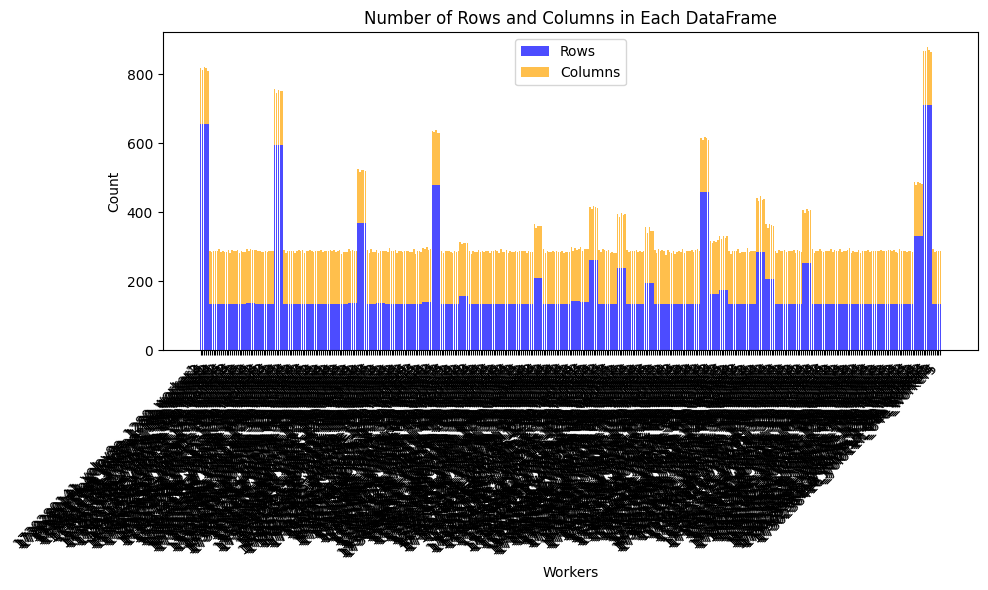

Number of unique columns across all DataFrames: 2013


In [3]:
import matplotlib.pyplot as plt

# Get all model subfolders
root_folder = '../data/minimized_run_3'
filename = 'worker1.feather'
model_folders = prep.find_subfolders_with_file(root_folder, filename)
print(model_folders)

unique_columns = set()
worker_stats = []

# For each worker feather
save_folder = "preprocessed_workers/"
for model_folder in model_folders:
    last_folder = os.path.basename(model_folder.strip('/'))
    for worker in range(1, 6):
        print(f"Preprocessing worker {worker}")
        path = f"{model_folder}/worker{worker}.feather"
        df = pd.read_feather(path)
        df = preprocess(df)

        # Collect statistics
        worker_stats.append({"worker": f"{last_folder}_worker{worker}", "rows": df.shape[0], "cols": df.shape[1]})

        # Gather unique columns across all DataFrames
        unique_columns.update(df.columns)

        save_path = f"{save_folder}/{last_folder}/"
        os.makedirs(save_path, exist_ok=True)
        df.to_feather(f"{save_path}worker{worker}.feather")
        print(f"Saved worker{worker} to {save_path}worker{worker}.feather")

# Plot number of rows and columns for each DataFrame
workers = [stat["worker"] for stat in worker_stats]
rows = [stat["rows"] for stat in worker_stats]
cols = [stat["cols"] for stat in worker_stats]

plt.figure(figsize=(10, 6))
plt.bar(workers, rows, label="Rows", alpha=0.7, color="blue")
plt.bar(workers, cols, label="Columns", alpha=0.7, color="orange", bottom=rows)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Workers")
plt.ylabel("Count")
plt.title("Number of Rows and Columns in Each DataFrame")
plt.legend()
plt.tight_layout()
plt.show()

# Compute the number of unique columns across all DataFrames
print(f"Number of unique columns across all DataFrames: {len(unique_columns)}")